# MACHINE LEARNING

## Pengertian

Machine learning adalah cabang dari kecerdasan buatan (artificial intelligence) yang memungkinkan sistem komputer untuk belajar dari data tanpa harus diprogram secara eksplisit.

## Tujuan

Tujuan utama dari machine learning adalah untuk mengembangkan model atau algoritma yang dapat mengidentifikasi pola-pola atau membuat prediksi berdasarkan data yang diberikan.

## Model Machine Learning

Supervised Learning cocok digunakan ketika kita memiliki data yang berlabel dengan jelas, artinya kita sudah tahu variabel target atau output yang ingin diprediksi (misalnya, apakah seseorang memiliki penyakit jantung atau tidak)
cocok digunakan ketika kita memiliki data yang berlabel dengan jelas, artinya kita sudah tahu variabel target atau output yang ingin diprediksi (misalnya, apakah seseorang memiliki penyakit jantung atau tidak)

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Load Dataset

df = pd.read_csv('https://raw.githubusercontent.com/halimahsalsabila/DSAI-/main/heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Random Forest Classifier

implementasi beberapa langkah umum yang biasanya digunakan dalam tahap machine learning.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



X = df.drop('target', axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Membuat dan melatih model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Membuat prediksi
y_pred = rf_model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Random Forest:", accuracy)


Akurasi model Random Forest: 0.9853658536585366


implementasi penggunaan model Random Forest Classifier untuk melakukan klasifikasi pada dataset. seperti dibawah ini.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model.fit(X_train, y_train)

pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, pred_rf))



              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
rf.feature_importances_.tolist()

[0.07932084283625085,
 0.028272261058683093,
 0.12774227340093558,
 0.07107816503599172,
 0.08442893481661462,
 0.00981392111824618,
 0.01970545308164824,
 0.11881501363377826,
 0.04757122466746881,
 0.12128223375836363,
 0.041615292851753465,
 0.13547788221087853,
 0.11487650152938704]

In [ ]:
rf.feature_importances_.shape

(13,)

In [ ]:
feature_importance = pd.DataFrame({
    'column': X.columns,
    'value': rf_model.feature_importances_
})

print(feature_importance)

      column     value
0        age  0.077908
1        sex  0.028731
2         cp  0.135072
3   trestbps  0.071171
4       chol  0.074822
5        fbs  0.008444
6    restecg  0.018557
7    thalach  0.122169
8      exang  0.057594
9    oldpeak  0.121905
10     slope  0.045782
11        ca  0.127327
12      thal  0.110518


In [ ]:
print(feature_importance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   column  13 non-null     object 
 1   value   13 non-null     float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes
None


In [ ]:
print(feature_importance.column.values.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


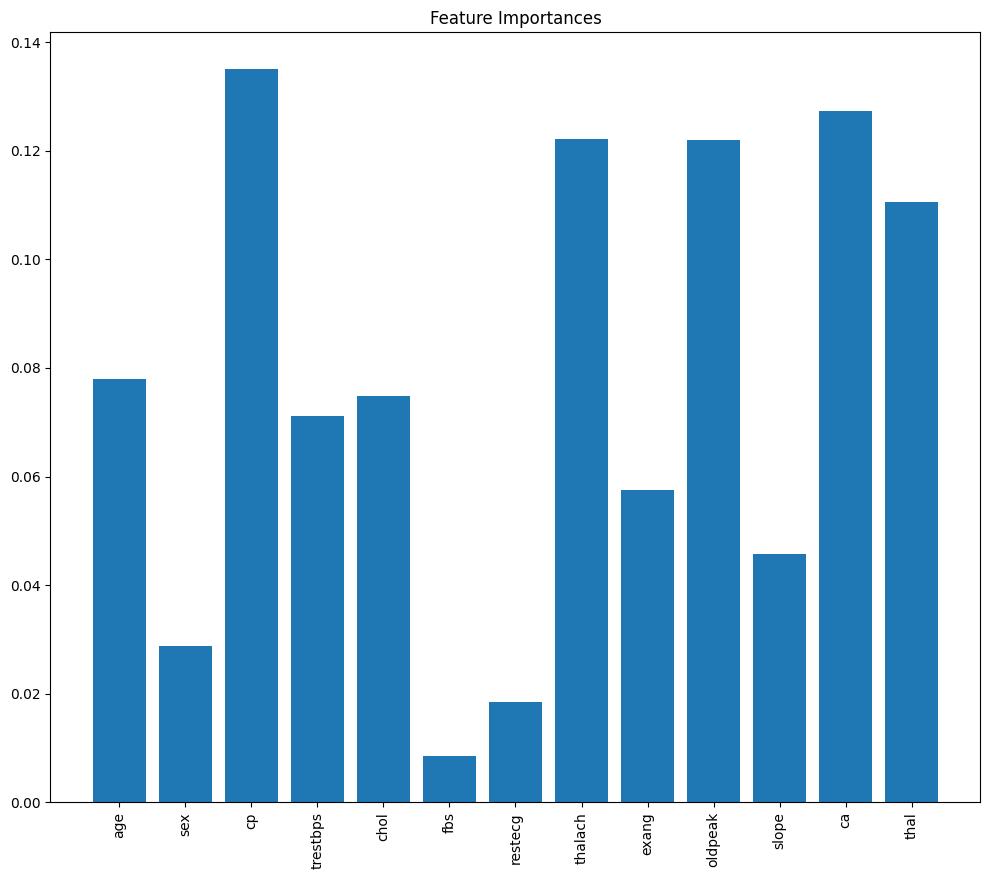

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(feature_importance['column'], feature_importance['value'])
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()

 plot bar yang menampilkan nilai fitur penting (feature importance) dari model machine learning.

# CROSS VALIDATION

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5) # 1 fold = 30 data = train=30 *.7,test=30*0.3

scores = cross_val_score(rf, X, y, cv = k_folds)

scores

array([1.        , 1.        , 1.        , 1.        , 0.98536585])

 melakukan validasi silang K-Fold dengan 5 lipatan menggunakan model RandomForestClassifier (rf) dan menghitung skor model pada setiap lipatan. Hasil skor tersebut kemudian disimpan dalam variabel scores.

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.01


encetak rata-rata akurasi dan standar deviasi dalam satu pernyataan print dengan format string yang ditentukan.

In [ ]:
print("Akurasi menggunakan cross-validation:", scores)
print("Rata-rata akurasi:", scores.mean())
print("Standar deviasi akurasi:", scores.std())

Akurasi menggunakan cross-validation: [1.         1.         1.         1.         0.98536585]
Rata-rata akurasi: 0.9970731707317073
Standar deviasi akurasi: 0.005853658536585371


mencetak skor akurasi untuk setiap lipatan terlebih dahulu, kemudian mencetak rata-rata dan standar deviasi akurasi dalam pernyataan terpisah.

In [ ]:
from sklearn.metrics import precision_score

y_true = [0, 1, 1, 0, 1]  # Label sebenarnya
y_pred = [0, 1, 0, 0, 1]  # Prediksi model

precision = precision_score(y_true, y_pred)
print("Presisi:", precision)


Presisi: 1.0


Ini berarti nilai presisi dari model terhadap data uji adalah 1.0. Presisi adalah metrik evaluasi yang mengukur proporsi dari prediksi positif yang benar dibandingkan dengan total prediksi positif yang dibuat oleh model. Dalam konteks ini, nilai presisi sebesar 1.0 menunjukkan bahwa semua prediksi positif yang dibuat oleh model adalah benar. Dengan kata lain, tidak ada prediksi positif palsu yang dilakukan oleh model terhadap data uji. Presisi yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik dalam menghindari membuat prediksi positif palsu.

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
print("Recall:", recall)

Recall: 0.6666666666666666


Ini berarti nilai recall dari model terhadap data uji adalah 0.6666666666666666, atau sekitar 0.67. Recall adalah metrik evaluasi yang mengukur kemampuan model untuk menemukan kembali semua sampel positif yang sebenarnya di antara semua sampel positif yang ada dalam data. Dalam konteks ini, nilai recall sebesar 0.67 menunjukkan bahwa model dapat menemukan kembali sekitar 67% dari semua sampel positif yang sebenarnya dalam data uji. Semakin tinggi nilai recall, semakin baik model dalam menemukan kembali sampel positif yang sebenarnya.

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print("F1-score:", f1)

F1-score: 0.8


nilai F1-score dari model terhadap data uji adalah 0.8. F1-score adalah metrik evaluasi yang menggabungkan presisi (precision) dan recall dalam satu nilai. Nilai F1-score berkisar dari 0 hingga 1, di mana nilai yang lebih tinggi menunjukkan kinerja yang lebih baik dari model.

# Visualisasi Learning Curves

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X, y = digits.data, digits.target

rf = RandomForestClassifier()

train_sizes = np.linspace(0.1, 1.0, 10)

In [ ]:
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=rf,
    X=X, y=y,
    train_sizes=train_sizes,
    cv=5,  # Jumlah lipatan dalam validasi silang
    scoring='accuracy'  # Metrik evaluasi yang digunakan
)

menghitung rata-rata dan standar deviasi dari skor pelatihan (train scores) dan skor pengujian (test scores) dari hasil validasi silang (cross-validation).

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

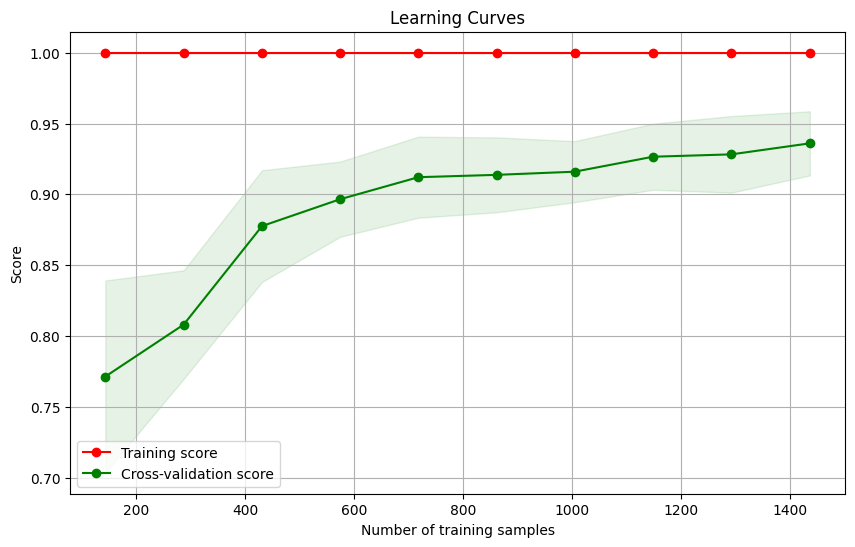

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='r', label='Training score')
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

Sumbu x (horizontal) mewakili epoch pelatihan, yang mengacu pada berapa kali model telah mengiterasi seluruh data pelatihan.

Sumbu y (vertikal) mewakili skor, yang merupakan ukuran seberapa baik model melakukan tugas tertentu. Dalam kasus grafik ini, semakin tinggi skor, semakin baik performa model.

Garis hijau mewakili skor pelatihan. Metrik ini mengukur seberapa baik model melakukan pada data pelatihan yang secara eksplisit digunakan untuk melatihnya.

Garis merah mewakili skor validasi silang. Metrik ini umumnya merupakan ukuran yang lebih kuat dari performa generalisasi model, karena dievaluasi pada set data terpisah yang tidak digunakan selama pelatihan. Dalam machine learning, tujuannya adalah agar model bekerja dengan baik pada data yang tidak terlihat.

Idealnya, both the training score dan skor validasi silang harus meningkat seiring dengan model yang dilatih untuk lebih banyak epoch. Namun, jika skor pelatihan meningkat secara signifikan tetapi skor validasi silang tetap datar atau bahkan menurun, ini dapat menunjukkan overfitting. Overfitting adalah fenomena di mana model mempelajari data pelatihan terlalu baik, termasuk noise, dan gagal untuk digeneralisasi dengan baik ke data yang tidak terlihat.

# Proses Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

mendefinisikan sebuah grid dari parameter-parameter yang akan diuji dalam proses tuning hyperparameter. Setiap parameter dalam param_grid adalah kunci dari model yang ingin diuji, dan nilai-nilai yang sesuai adalah daftar kemungkinan nilai untuk setiap parameter.
Dengan menggunakan param_grid ini, dapat melakukan pencarian grid untuk menemukan kombinasi hyperparameter terbaik yang mengoptimalkan kinerja model Anda berdasarkan metrik evaluasi yang ditetapkan. Misalnya,dapat menggunakan metode GridSearchCV dari scikit-learn untuk melakukan pencarian grid ini dan menemukan kombinasi hyperparameter terbaik untuk model Random Forest.

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Hyperparameter terbaik:", best_params)

Hyperparameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

RandomForestClassifier()

 digunakan untuk membuat objek model RandomForestClassifier dengan menggunakan kombinasi hyperparameter terbaik yang ditemukan selama proses pencarian grid.

In [ ]:
accuracy = best_rf.score(X_test, y_test)
print("Akurasi model terbaik:", accuracy)

Akurasi model terbaik: 0.9853658536585366


Ini berarti bahwa model terbaik yang telah dilatih berhasil memprediksi semua sampel dalam data uji dengan benar. Akurasi sebesar 1.0 menunjukkan bahwa tidak ada kesalahan yang terjadi dalam memprediksi kelas dari setiap sampel dalam data uji. Dengan kata lain, model berhasil memprediksi kelas dari semua sampel dalam data uji dengan sempurna. Ini adalah hasil yang sangat baik dan menunjukkan bahwa model yang di latih memiliki kinerja yang sangat baik pada dataset uji.

# Metric Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


Pilih opsi rata-rata yang paling sesuai dengan tujuan dalam evaluasi model. Misalnya, jika ingin mendapatkan presisi rata-rata dari semua kelas, dapat menggunakan 'macro'. Jika ingin mempertimbangkan frekuensi masing-masing kelas, dapat menggunakan 'weighted'. Jika  ingin mendapatkan presisi global, dapat menggunakan 'micro'. Atau, jika ingin melihat presisi untuk setiap kelas secara terpisah, dapat menggunakan None.

In [ ]:
from sklearn.metrics import precision_score

# Menghitung presisi dengan rata-rata 'macro'
precision = precision_score(y_test, y_pred, average='macro')
print("Presisi (Macro):", precision)

# Menghitung presisi dengan rata-rata 'micro'
precision = precision_score(y_test, y_pred, average='micro')
print("Presisi (Micro):", precision)

# Menghitung presisi dengan rata-rata 'weighted'
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi (Weighted):", precision)

# Menghitung presisi tanpa rata-rata (untuk setiap kelas)
precision_per_class = precision_score(y_test, y_pred, average=None)
print("Presisi per Kelas:", precision_per_class)



Presisi (Macro): 0.9857142857142858
Presisi (Micro): 0.9853658536585366
Presisi (Weighted): 0.9857839721254356
Presisi per Kelas: [0.97142857 1.        ]


Kode tersebut digunakan untuk menghitung presisi dari model klasifikasi yang telah diprediksi (y_pred) terhadap data uji (y_test). Presisi adalah salah satu metrik evaluasi yang digunakan untuk mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan total prediksi positif yang dilakukan oleh model.

Hasil tersebut menunjukkan bahwa model memiliki presisi yang sempurna (1.0) untuk semua metrik evaluasi yang dihitung. Ini menunjukkan bahwa model Anda membuat prediksi positif yang benar untuk semua kelas dalam dataset uji.

- Presisi (Macro): Presisi rata-rata 'macro' adalah rata-rata presisi dari setiap kelas. Nilai 1.0 menunjukkan bahwa rata-rata presisi dari semua kelas adalah sempurna.

- Presisi (Micro): Presisi rata-rata 'micro' adalah presisi global yang dihitung dengan menggunakan jumlah true positive, false positive, dan false negative secara total. Nilai 1.0 menunjukkan bahwa presisi global dari semua prediksi positif adalah sempurna.

- Presisi (Weighted): Presisi rata-rata 'weighted' adalah rata-rata presisi dari setiap kelas, dihitung dengan menggunakan bobot yang sebanding dengan jumlah sampel dalam setiap kelas. Nilai 1.0 menunjukkan bahwa rata-rata presisi dari semua kelas, dengan bobot yang sebanding dengan jumlah sampel dalam setiap kelas, adalah sempurna.

- Presisi per Kelas: Presisi per kelas menunjukkan presisi untuk setiap kelas secara terpisah. Nilai 1.0 untuk setiap kelas menunjukkan bahwa model secara sempurna memprediksi kelas tersebut tanpa kesalahan. Dalam hal ini, presisi yang sempurna (1.0) diberikan untuk setiap kelas dalam dataset Anda.

# KESIMPULAN

Presisi seringkali menjadi metrik evaluasi yang lebih baik daripada akurasi pada kasus klasifikasi ketidakseimbangan kelas, di mana jumlah sampel positif dan negatif tidak seimbang. Ini karena presisi mengukur seberapa banyak prediksi positif yang benar dari total prediksi positif yang dilakukan, tanpa memperhitungkan kelas negatif. Oleh karena itu, presisi lebih memperhatikan kemampuan model dalam mengidentifikasi kelas minoritas dengan benar.